## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special

py.offline.init_notebook_mode(connected=True)   
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

### Importer les données

In [3]:
#load & view raw data
df = pd.read_csv('output/pec_prep_out.csv')
df=df.drop([ "Unnamed: 0"], axis=1)
df.head()

,Compagnie d'assurance,Date de création,Nom et Prénom Assuré /Raison Sociale,Immatriculation Véhicule assuré,Mode de gestion,Garantie impliquée,Chargé réparation,Marque,Réparateur,Expert,Compagnie adverse,Accord VR (Véhicule de remplacement),Agence,Agent,Cas de barème,Chargé acceptation,Code agence,Date Accident,Date acceptation,Date accord (SST),Date demande,Etape Dossier,Etat d'approbation,Immatriculation tiers,Montant total devis,Nom et Prénom tiers /Raison Sociale,Numero sinistre,Numéro de contrat,Point Choc,Position GA,SST,Nbr réclamations antérieures,Day Accident,Month Accident,Year Accident,Day demande,Month demande,Year demande,Retard reclamation,Fraud
0,EL AMANA TAKAFUL,43664,NACEUR HBIBI,9594TU195,IDA,Défense et recours,Asma TURKI,ISUZU,MECATOL,Hadiji Yassine,MAE,NON,global assurance,global assurance,10.0,Ouni Hela,744,03/31/2019,04/04/2019 11:15,10/04/2019 13:22,04/04/2019,Véhicule réparé: en instance de Signature du BS,Approuvé ( Chef cellule Acceptation ),5178TU196,914.604,STE ATELIER GHRAPHIQUE,S19/9165,2015.5.0088637/3,"Tiers Ar. D,Tiers Lat. D",Recours,Fathi Nguili,2,31,3,2019,4,4,2019,4,Non
1,LA CARTE,16/12/2019,STE HOTEL BYZANCE,6657TU193,Dommages,Dommages au véhicule,,ALFA ROMEO,NaN,NaN,ASSURANCES STAR,NaN,mohamed boussaa,mohamed boussaa,9.0,Ouni Hela,780,12/04/2019,26/12/2019 17:23,NaN,12/09/2019,En instance d'établissement Devis,Approuvé ( Chef cellule Acceptation ),9332TU62,NaN,EL GHOUL AHMED BEN AMOR,S1955133140,201950000046682,Tiers Ar. D,Recours,,1,4,12,2019,9,12,2019,5,Non
2,LLOYD TUNISIEN,43475.0,MOUNA BEJAOUI,6130TU156,Dommages,Tierce collision,Asma TURKI,KIA,SPEED SERVICES,Salah BEN HASSINE,BIAT assurances,NON,sondos ayoub,sondos ayoub,15.0,Ouni Hela,658,05/21/2019,28/05/2019 12:40,11/06/2019 13:06,05/24/2019,Véhicule réparé: en instance de Signature du BS,Approuvé ( Chef cellule Acceptation ),1984TU124,1790.491,IMMOBILIERE GRAND ATLAS,S19551114002,201850000077730,Tiers Lat. D,Recours,Tayssir HMAIED,1,21,5,2019,24,5,2019,3,Non
3,LLOYD TUNISIEN,43518.0,SOUHAIELA RIGHI,341TU196,Dommages,Tierce collision,Ouni Dhekra,VOLKSWAGEN,Société EL-FATAH,Hadiji Yassine,LLOYD TUNISIEN,NON,wajih laamiri,wajih laamiri,NaN,Ouni Hela,776,03/30/2019,05/04/2019 17:39,20/05/2019 14:35,04/05/2019,Véhicule réparé: en instance de Signature du BS,Approuvé ( Chef cellule Acceptation ),NaN,2468.064,NaN,S19551109400,201650000091405,Tiers Ar. D,Défense,Fathi Nguili,1,30,3,2019,5,4,2019,6,Non
4,LLOYD TUNISIEN,43521.0,AHMED BRAHAM,7445TU172,Dommages,Tierce collision,Ouni Dhekra,VOLKSWAGEN,Société EL-FATAH,Amara Ayari,GAT assurances,OUI,aisaoui fathi,aisaoui fathi,10.0,Ouni Hela,685,04/07/2019,16/04/2019 17:35,22/04/2019 12:55,04/15/2019,Véhicule réparé: en instance de Signature du BS,Approuvé ( Chef cellule Acceptation ),6214TU68,2972.116,ALI JOUILI,S1955109776,201850000041652,Tiers Av. G,Recours,Fathi Nguili,1,7,4,2019,15,4,2019,8,Non


#### Statistical descriptions of the columns

In [4]:
df.columns

Index(['Compagnie d'assurance', 'Date de création',
       'Nom et Prénom Assuré /Raison Sociale',
       'Immatriculation Véhicule assuré', 'Mode de gestion',
       'Garantie impliquée', 'Chargé réparation', 'Marque', 'Réparateur',
       'Expert', 'Compagnie adverse', 'Accord VR (Véhicule de remplacement)',
       'Agence', 'Agent', 'Cas de barème', 'Chargé acceptation', 'Code agence',
       'Date Accident', 'Date acceptation', 'Date accord (SST)',
       'Date demande', 'Etape Dossier', 'Etat d'approbation',
       'Immatriculation tiers', 'Montant total devis',
       'Nom et Prénom tiers /Raison Sociale', 'Numero sinistre',
       'Numéro de contrat', 'Point Choc', 'Position GA', 'SST',
       'Nbr réclamations antérieures', 'Day Accident', 'Month Accident',
       'Year Accident', 'Day demande', 'Month demande', 'Year demande',
       'Retard reclamation', 'Fraud'],
      dtype='object')

In [5]:
df.describe()

,Cas de barème,Code agence,Montant total devis,Nbr réclamations antérieures,Day Accident,Month Accident,Year Accident,Day demande,Month demande,Year demande,Retard reclamation
count,900.000000,1097.000000,879.000000,1097.000000,1097.000000,1097.000000,1097.0,1097.000000,1097.000000,1097.0,1097.000000
mean,9.738889,627.981768,3464.622109,1.113036,15.578851,6.026436,2019.0,16.330902,6.340018,2019.0,10.252507
std,5.935474,184.827626,4070.427926,0.372386,8.679062,3.430785,0.0,8.620067,3.449079,0.0,20.027469
min,1.000000,100.000000,31.540000,1.000000,1.000000,1.000000,2019.0,1.000000,1.000000,2019.0,0.000000
25%,5.000000,585.000000,1101.862500,1.000000,8.000000,3.000000,2019.0,9.000000,3.000000,2019.0,3.000000
50%,10.000000,687.000000,2090.393000,1.000000,15.000000,6.000000,2019.0,16.000000,6.000000,2019.0,5.000000
75%,14.000000,759.000000,4108.100000,1.000000,23.000000,9.000000,2019.0,24.000000,9.000000,2019.0,10.000000
max,25.000000,803.000000,29893.393000,4.000000,31.000000,12.000000,2019.0,31.000000,12.000000,2019.0,277.000000


In [6]:
df.dtypes

Compagnie d'assurance                    object
Date de création                         object
Nom et Prénom Assuré /Raison Sociale     object
Immatriculation Véhicule assuré          object
Mode de gestion                          object
Garantie impliquée                       object
Chargé réparation                        object
Marque                                   object
Réparateur                               object
Expert                                   object
Compagnie adverse                        object
Accord VR (Véhicule de remplacement)     object
Agence                                   object
Agent                                    object
Cas de barème                           float64
Chargé acceptation                       object
Code agence                               int64
Date Accident                            object
Date acceptation                         object
Date accord (SST)                        object
Date demande                            

In [7]:
df.shape

(1097, 40)

In [8]:
df.nunique()

Compagnie d'assurance                      9
Date de création                         446
Nom et Prénom Assuré /Raison Sociale    1041
Immatriculation Véhicule assuré         1052
Mode de gestion                            4
Garantie impliquée                         8
Chargé réparation                         10
Marque                                    41
Réparateur                                69
Expert                                    29
Compagnie adverse                         16
Accord VR (Véhicule de remplacement)       2
Agence                                    98
Agent                                     98
Cas de barème                             19
Chargé acceptation                         3
Code agence                               97
Date Accident                            334
Date acceptation                         839
Date accord (SST)                        827
Date demande                             249
Etape Dossier                             17
Etat d'app

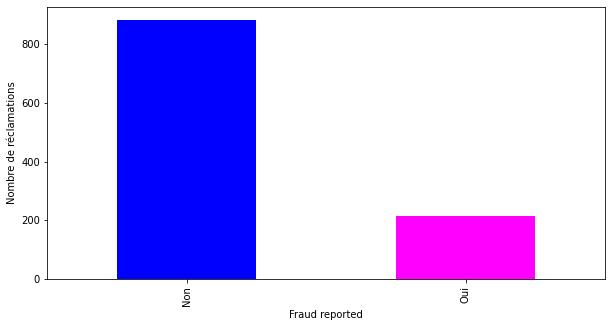

In [9]:
ax = pd.value_counts(df['Fraud']).plot.bar(color=['blue', 'magenta'], figsize=(10,5))
ax.set_xlabel('Fraud reported')
ax.set_ylabel('Nombre de réclamations')
plt.savefig('../frontend/src/assets/figure_EDA/Nbr_reclam_fraud.png',dpi=400)

plt.show()
# plt.savefig('figure_EDA/Nbr_reclam_fraud')

In [10]:
df['Fraud'].value_counts() 

Non    882
Oui    215
Name: Fraud, dtype: int64

In [11]:
df['Mode de gestion'].value_counts()

IDA         583
Dommages    414
HIDA         69
Connexe      31
Name: Mode de gestion, dtype: int64

In [12]:
df['Nbr réclamations antérieures'].value_counts()

1    990
2     94
3      9
4      4
Name: Nbr réclamations antérieures, dtype: int64

In [13]:
df['Garantie impliquée'].value_counts()

Défense et recours       683
Dommages au véhicule     174
Tierce                   100
Bris de glace             58
Dommages collisions       43
Tierce collision          34
Incendie partiel           4
Vol partiel                1
Name: Garantie impliquée, dtype: int64

In [14]:
fig = px.bar(df, x='Garantie impliquée', y='Montant total devis', color='Garantie impliquée' )
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/montant_garantie.png")

In [15]:
fig = px.bar(df, x='Mode de gestion', y='Montant total devis', color='Mode de gestion' )
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/montant_mode.png")

In [16]:
fig = px.bar(df, x='Point Choc', y='Fraud', color='Cas de barème' )
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/pt_choc_fraud.png")

In [ ]:
fig = px.histogram(df, x='Mode de gestion', color='Fraud', histnorm='probability density')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/mode_gestion_fraud.png")

In [ ]:
fig = px.histogram(df, x="Montant total devis", color="Fraud", marginal="box", hover_data=df.columns)
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/montant_fraud.png")

In [ ]:
labels = ['Recours', 'Défense']
fig = px.pie(df, values=df['Position GA'].value_counts(), names=labels, title='Position GA')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/positionGA.png")

In [ ]:
fig = px.pie(df, values=df['Mode de gestion'].value_counts(), names=df['Mode de gestion'].value_counts().keys(), title='Incident Type', )
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/mode_gestion.png")

In [ ]:
# df[df["Marque"] =='VOLKSWAGEN']['Fraud'].value_counts()

In [ ]:
# df[df["Marque"] =='CITROËN']['Fraud'].value_counts()

In [ ]:
fig = px.histogram(df, x='Marque',  color='Fraud')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/marque.png")

In [ ]:
fig = px.histogram(df, x='Point Choc',  color='Fraud')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/pt_choc.png")

In [ ]:
fig = px.histogram(df, x='Cas de barème',  color='Fraud')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/cas_bareme.png")

In [ ]:
fig = px.histogram(df, x='Month Accident',  color='Fraud')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/month_accident.png")

In [ ]:
fig = px.histogram(df, x='Nbr réclamations antérieures',  color='Fraud')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/nbr_reclam.png")

In [ ]:
fig = px.histogram(df, x="Compagnie d'assurance",  color='Fraud')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/compagnie_assurance.png")

In [ ]:
fig = px.histogram(df, x='Compagnie adverse',  color='Fraud', histnorm='probability density')
fig.show()
fig.write_image("../frontend/src/assets/figure_EDA/compagnie_adverse.png")